# Análisis de la data preprocesada:

El objetivo de este notebook es analizar la data levantada, preprocesada y los modelos de word embedding para tomar mejores decisiones sobre el input antes del feature engineering.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Importamos los data frames habiendo utilizado el modelo de BETO y RoBERTuito de Word Embedding

In [24]:
df_sentiment_beto = pd.read_csv('../data/sentiment_data_beto.csv')
df_sentiment_robertuito = pd.read_csv('../data/sentiment_data.csv')
df_sentiment_beto["createdAt"] = pd.to_datetime(df_sentiment_beto["createdAt"])
df_sentiment_robertuito["createdAt"] = pd.to_datetime(df_sentiment_robertuito["createdAt"])

Creamos un data frame combinado para poder comparar ambos modelos

In [25]:
df_comparacion = df_sentiment_beto.merge(df_sentiment_robertuito, on="text", suffixes=("_beto", "_robertuito"))

------------

## Limpieza de la data:

Primero analizamos algunos tweets, el contenido de texto de esos tweets y contruimos un word cloud para analizar la calidad del contenido preprocesado de tweets.

In [26]:
text = " ".join(df_sentiment_robertuito["text"].dropna())
text[:500]

'gabriel boric retiró municipalidad santiago tras extensa jornada reuniones bilaterales presidentes representantes internacionales horas cambio mando presidente electo gabriel boric llega cerro castillo hace años atrás dirigente estudiantil gabriel boric increpaba presidente sebastián piñera diciéndole gobernantes deber escuchar propone calle mismo dirigente estudiantil asumirá presidencia chile lista primera foto oficial equipo gobierno presidente electo chile gabriel boric minutos asumir mando '

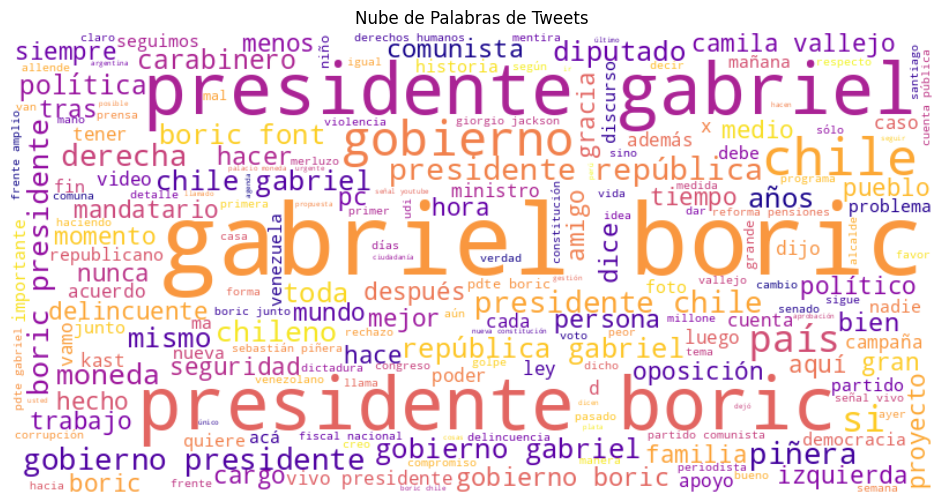

In [10]:
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap='plasma', max_words=200).generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras de Tweets")
plt.show()

------------

## Análisis del dataset:

Ahora analizamos la distribución del scraping de tweets por día:

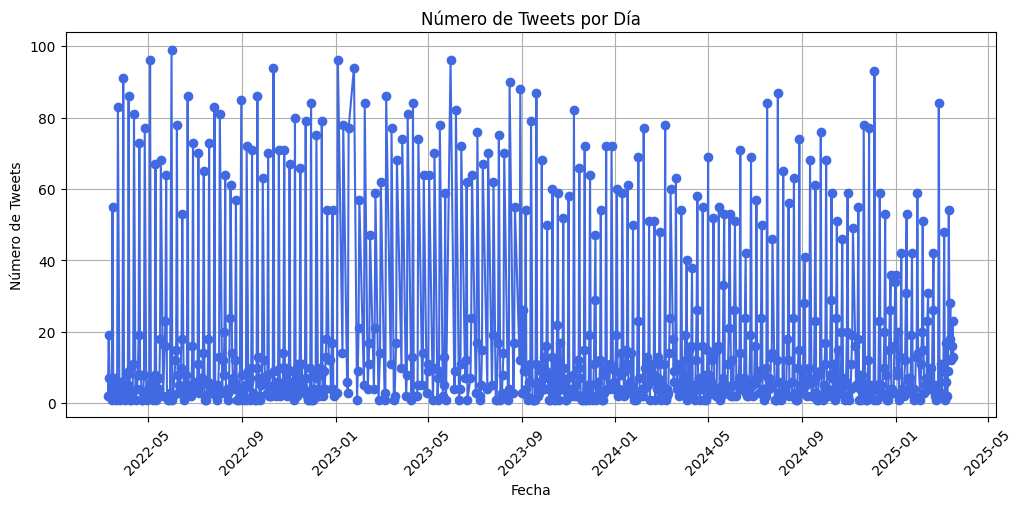

In [11]:
df_sentiment_robertuito["createdAt"] = pd.to_datetime(df_sentiment_robertuito["createdAt"])
tweets_per_day = df_sentiment_robertuito["createdAt"].dt.date.value_counts().sort_index()
plt.figure(figsize=(12, 5))
tweets_per_day.plot(kind="line", marker="o", color="royalblue")
plt.xlabel("Fecha")
plt.ylabel("Número de Tweets")
plt.title("Número de Tweets por Día")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Primero veamos como se distribuye el largo de tweets (medido en palabras):

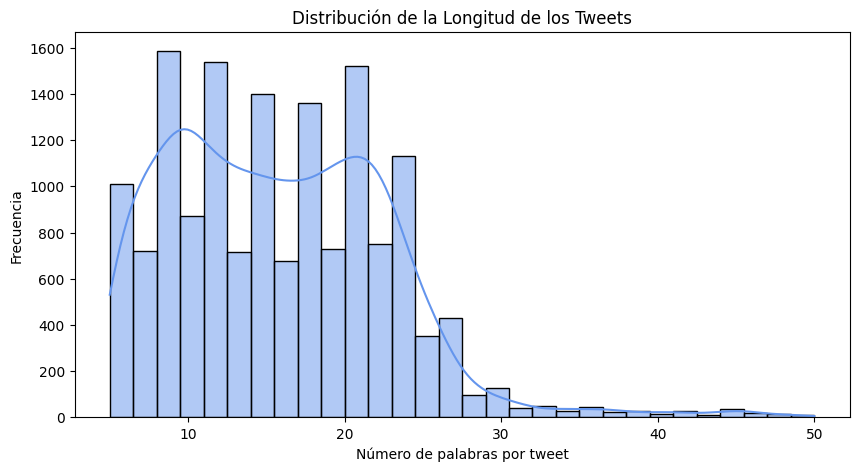

In [12]:
df_sentiment_robertuito["tweet_length"] = df_sentiment_robertuito["text"].astype(str).apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
sns.histplot(df_sentiment_robertuito["tweet_length"], bins=30, kde=True, color="cornflowerblue")
plt.xlabel("Número de palabras por tweet")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Longitud de los Tweets")
plt.show()

## Sentiment Analysis:

El principal desafío es poder determinar que modelo Transforme es mejor: BETO o RoBERTuito.

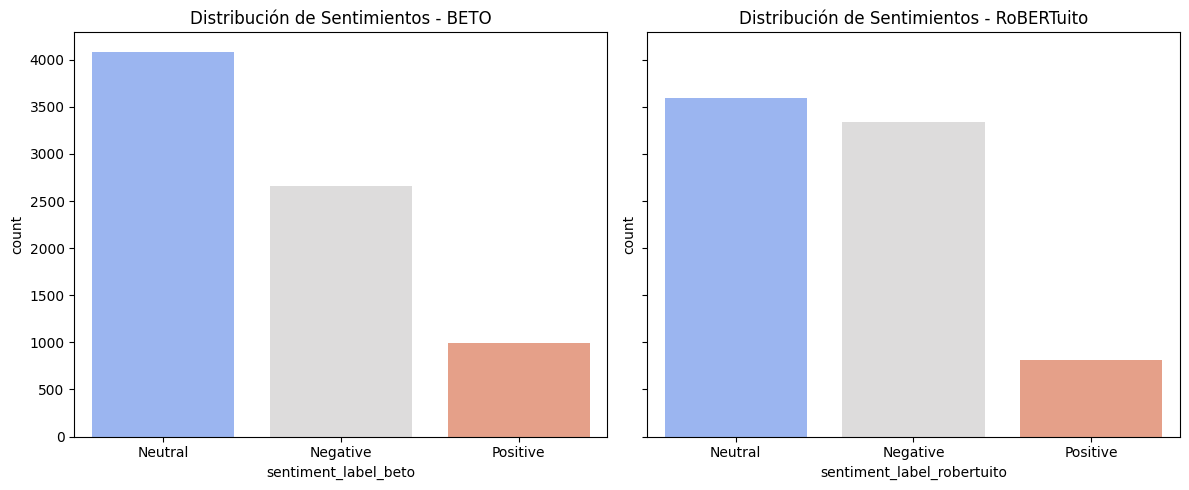

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
sns.countplot(data=df_comparacion, x="sentiment_label_beto", ax=axes[0], palette="coolwarm")
axes[0].set_title("Distribución de Sentimientos - BETO")
sns.countplot(data=df_comparacion, x="sentiment_label_robertuito", ax=axes[1], palette="coolwarm")
axes[1].set_title("Distribución de Sentimientos - RoBERTuito")
plt.tight_layout()
plt.show()

In [14]:
coincidencias = (df_comparacion["sentiment_label_beto"] == df_comparacion["sentiment_label_robertuito"]).mean()
print(f"✅ Tasa de coincidencia entre BETO y RoBERTuito: {coincidencias:.2%}")

✅ Tasa de coincidencia entre BETO y RoBERTuito: 71.10%


In [15]:
df_beto = df_sentiment_beto[['id', 'text', 'sentiment_label', 'score_negative', 'score_neutral', 'score_positive']]
df_beto = df_beto.rename(columns={'sentiment_label': 'label_beto', 'score_negative': 'neg_beto', 'score_neutral': 'neu_beto', 'score_positive': 'pos_beto'})

df_robertuito = df_sentiment_robertuito[['id', 'text', 'sentiment_label', 'score_negative', 'score_neutral', 'score_positive']]
df_robertuito = df_robertuito.rename(columns={'sentiment_label': 'label_robertuito', 'score_negative': 'neg_robertuito', 'score_neutral': 'neu_robertuito', 'score_positive': 'pos_robertuito'})
pd.set_option('display.max_colwidth', None)
# Unir las bases por la columna 'id'
df_combined = pd.merge(df_beto, df_robertuito, on=['id', 'text'], how='outer')
df_combined.head(50)

,id,text,label_beto,neg_beto,neu_beto,pos_beto,label_robertuito,neg_robertuito,neu_robertuito,pos_robertuito
0,1502024189821259782,gabriel boric retiró municipalidad santiago tras extensa jornada reuniones bilaterales presidentes representantes internacionales horas cambio mando,Neutral,0.032491,0.965239,0.002269,Neutral,0.253885,0.651398,0.094717
1,1502066098333790213,presidente electo gabriel boric llega cerro castillo,Neutral,0.001315,0.994130,0.004555,Neutral,0.091410,0.620795,0.287795
2,1502234042749669379,hace años atrás dirigente estudiantil gabriel boric increpaba presidente sebastián piñera diciéndole gobernantes deber escuchar propone gente calle mismo dirigente estudiantil hoy asumirá presidencia chile cambiodemando,Neutral,0.005213,0.990762,0.004025,NaN,NaN,NaN,NaN
3,1502290076448870402,lista primera foto oficial equipo gobierno cambiociudadano,Neutral,0.000787,0.997872,0.001341,NaN,NaN,NaN,NaN
4,1502293643230597125,loúltimo presidente electo chile gabriel boric minutos asumir mando ceremonia asiste invitado especial gustavo petro,Neutral,0.014598,0.971573,0.013830,NaN,NaN,NaN,NaN
5,1502306271634116616,ahora gabriel boric asume nuevo presidente república chile cambiodemando,Neutral,0.021265,0.974700,0.004035,NaN,NaN,NaN,NaN
6,1502307291936272392,boric asume presidente chile lado presidente saliente piñera aquí presidenta congreso dejó sagasti entrara congreso diera discurso recibieron banda patio nomás formas formas cambiodemando,Neutral,0.012341,0.985558,0.002101,NaN,NaN,NaN,NaN
7,1502307622359388164,cuadro oficial gabriel boric font presidente república chile vivo cambiodemando,Neutral,0.001371,0.997429,0.001200,NaN,NaN,NaN,NaN
8,1502308637196357632,boric desborda emoción lógico hace años gritaba líder estudiantil calles chile hoy presidente años,Positive,0.001928,0.000886,0.997186,NaN,NaN,NaN,NaN
9,1502310169069428737,adncambiodemando foto oficial presidente república gabriel boric,Neutral,0.000626,0.998280,0.001095,NaN,NaN,NaN,NaN


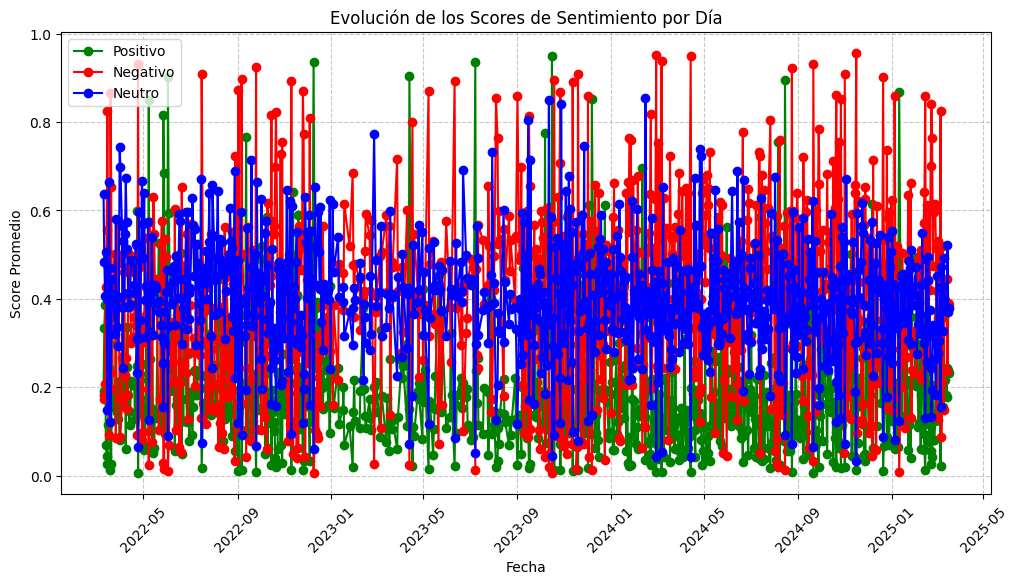

In [20]:
scores_diarios = df_sentiment_robertuito.groupby(df_sentiment_robertuito["createdAt"].dt.date)[["score_positive", "score_negative", "score_neutral"]].mean()

plt.figure(figsize=(12, 6))
plt.plot(scores_diarios.index, scores_diarios["score_positive"], marker="o", linestyle="-", color="g", label="Positivo")
plt.plot(scores_diarios.index, scores_diarios["score_negative"], marker="o", linestyle="-", color="r", label="Negativo")
plt.plot(scores_diarios.index, scores_diarios["score_neutral"], marker="o", linestyle="-", color="b", label="Neutro")
plt.xlabel("Fecha")
plt.ylabel("Score Promedio")
plt.title("Evolución de los Scores de Sentimiento por Día")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

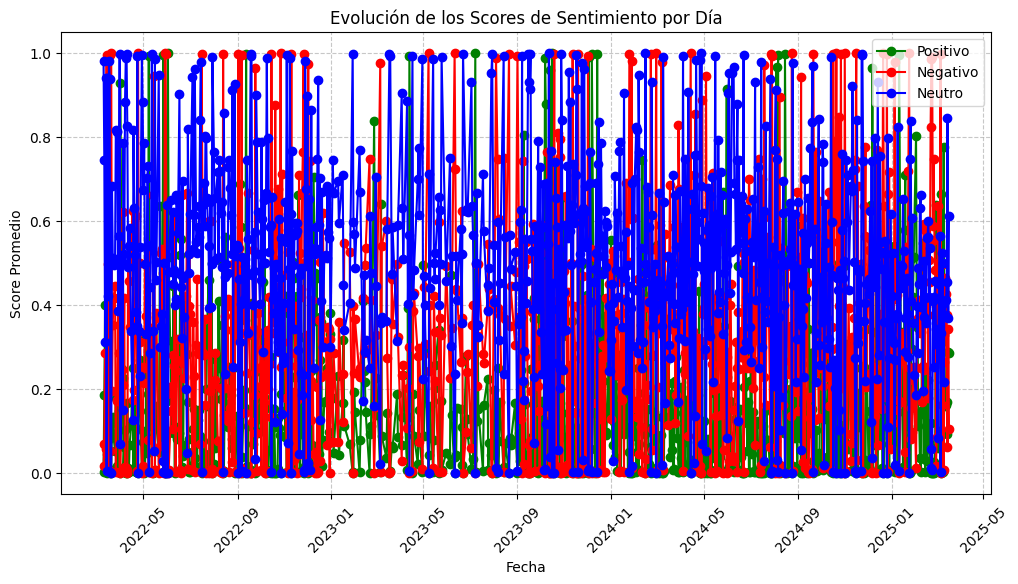

In [21]:
scores_diarios = df_sentiment_beto.groupby(df_sentiment_beto["createdAt"].dt.date)[["score_positive", "score_negative", "score_neutral"]].mean()

plt.figure(figsize=(12, 6))
plt.plot(scores_diarios.index, scores_diarios["score_positive"], marker="o", linestyle="-", color="g", label="Positivo")
plt.plot(scores_diarios.index, scores_diarios["score_negative"], marker="o", linestyle="-", color="r", label="Negativo")
plt.plot(scores_diarios.index, scores_diarios["score_neutral"], marker="o", linestyle="-", color="b", label="Neutro")
plt.xlabel("Fecha")
plt.ylabel("Score Promedio")
plt.title("Evolución de los Scores de Sentimiento por Día")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

## Análisis de correlación:

In [37]:
df_numeric = df_sentiment_robertuito.select_dtypes(include=['number'])

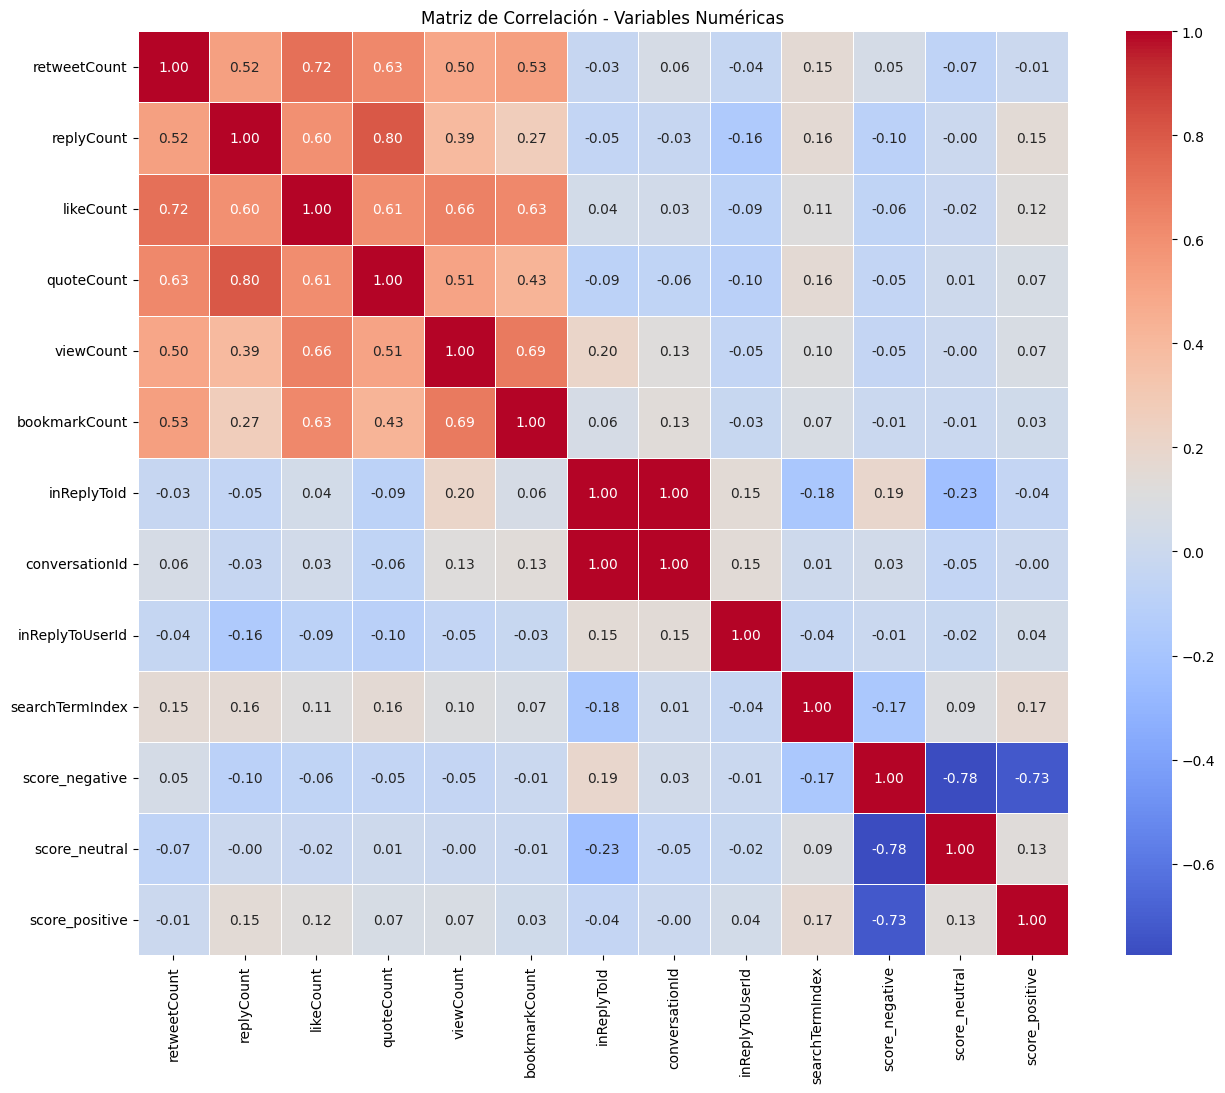

In [38]:
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación - Variables Numéricas")
plt.show()

Al análisis de correlación podemos incorporar la variable de la encuesta, para ver si los scores del sentiment análisis tiene algo de relación con la aprobación presidencial.

In [44]:
df = pd.read_csv("../data/features_dataset.csv")
df_encuestas = pd.read_csv("../data/encuesta.csv")
df["date"] = pd.to_datetime(df["date"])
df_encuestas["date"] = pd.to_datetime(df_encuestas["date"])
df_encuestas["week_start"] = df_encuestas["date"] - pd.to_timedelta(df_encuestas["date"].dt.weekday, unit="D")
df["week_start"] = df["date"] - pd.to_timedelta(df["date"].dt.weekday, unit="D")
df_final = df.merge(df_encuestas[["week_start", "aprobacion_boric"]], on="week_start", how="left")
#df_final.drop(columns=["week_start"], inplace=True)
df_final = df_final.sort_values("date")
df_final = df_final.dropna()

## Variables de tiempo:
df_final["year"] = df_final["date"].dt.year
df_final["month"] = df_final["date"].dt.month
df_final["day"] = df_final["date"].dt.day
df_final["dayofweek"] = df_final["date"].dt.dayofweek  
df_final["approval_rolling_7d"] = df_final["aprobacion_boric"].rolling(window=7, min_periods=1).mean()
df_final["approval_lag_7d"] = df_final["aprobacion_boric"].shift(7)
df_final["approval_diff"] = df_final["aprobacion_boric"].diff()
df_final["approval_pct_change"] = df_final["aprobacion_boric"].pct_change()
for lag in range(1, 8): 
    df_final[f"score_positive_lag_{lag}"] = df_final["score_positive"].shift(lag)
    df_final[f"score_negative_lag_{lag}"] = df_final["score_negative"].shift(lag)
    df_final[f"score_neutral_lag_{lag}"] = df_final["score_neutral"].shift(lag)
df_final = df_final.dropna()

In [45]:
columnas = ['score_positive', 'score_neutral', 'score_negative', 'aprobacion_boric']
for lag in range(1, 8):
    columnas.append(f"score_positive_lag_{lag}")
    columnas.append(f"score_negative_lag_{lag}")
    columnas.append(f"score_neutral_lag_{lag}")
df_eda = df_final[columnas]
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 11 to 1088
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   score_positive        1078 non-null   float64
 1   score_neutral         1078 non-null   float64
 2   score_negative        1078 non-null   float64
 3   aprobacion_boric      1078 non-null   float64
 4   score_positive_lag_1  1078 non-null   float64
 5   score_negative_lag_1  1078 non-null   float64
 6   score_neutral_lag_1   1078 non-null   float64
 7   score_positive_lag_2  1078 non-null   float64
 8   score_negative_lag_2  1078 non-null   float64
 9   score_neutral_lag_2   1078 non-null   float64
 10  score_positive_lag_3  1078 non-null   float64
 11  score_negative_lag_3  1078 non-null   float64
 12  score_neutral_lag_3   1078 non-null   float64
 13  score_positive_lag_4  1078 non-null   float64
 14  score_negative_lag_4  1078 non-null   float64
 15  score_neutral_lag_4 

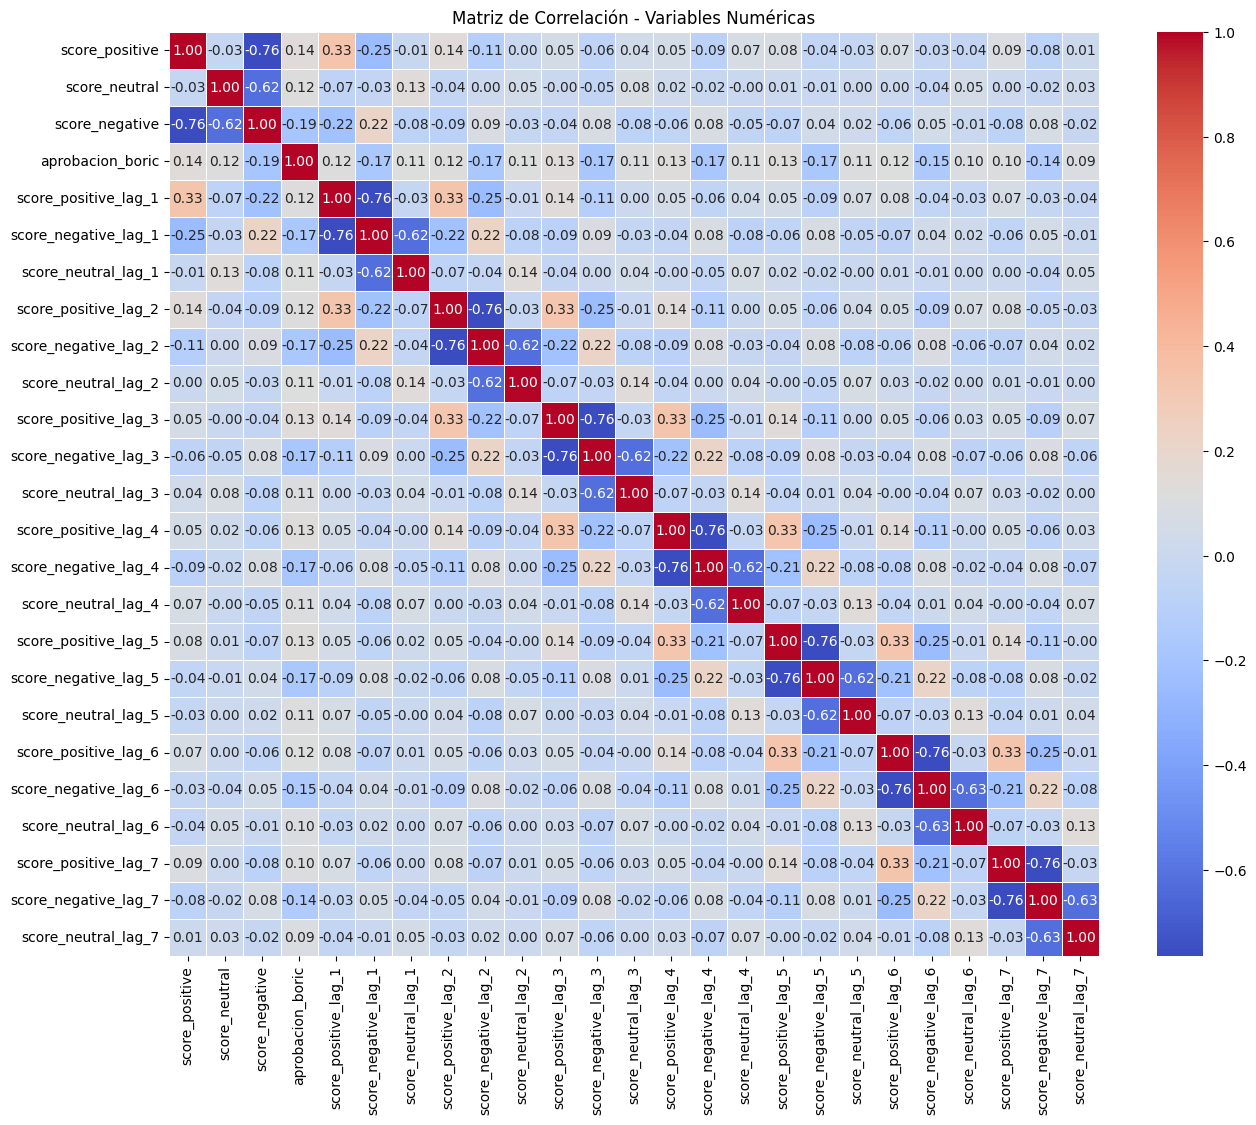

In [46]:
correlation_matrix = df_eda.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación - Variables Numéricas")
plt.show()

In [50]:
df_final['score_negative_rolling3'] = df_final['score_negative'].rolling(window=3, min_periods=3).mean()
df_final[['score_negative_rolling3', 'aprobacion_boric']].corr()

,score_negative_rolling3,aprobacion_boric
score_negative_rolling3,1.000000,-0.272637
aprobacion_boric,-0.272637,1.000000


In [51]:
df_final['score_negative_rolling7'] = df_final['score_negative'].rolling(window=7, min_periods=3).mean()
df_final[['score_negative_rolling7', 'aprobacion_boric']].corr()

,score_negative_rolling7,aprobacion_boric
score_negative_rolling7,1.000000,-0.368862
aprobacion_boric,-0.368862,1.000000


In [52]:
df_final['sentiment_net'] = df_final['score_positive'] - df_final['score_negative']
df_final['sentiment_net_rolling7'] = df_final['sentiment_net'].rolling(window=7, min_periods=3).mean()
df_final[['sentiment_net_rolling7', 'aprobacion_boric']].corr()

,sentiment_net_rolling7,aprobacion_boric
sentiment_net_rolling7,1.000000,0.334506
aprobacion_boric,0.334506,1.000000


Vemos que la correlación de 1 sólo lag de los scores (sentimiento)

In [53]:
df_final["approval_rolling_7d"] = df_final["aprobacion_boric"].rolling(window=7, min_periods=1).mean()
df_final["approval_lag_7d"] = df_final["aprobacion_boric"].shift(7)
df_final["approval_diff"] = df_final["aprobacion_boric"].diff()

In [55]:
columnas = ['score_positive', 'score_neutral', 'score_negative', 'aprobacion_boric', 'score_negative_rolling3', 'score_negative_rolling7', 'sentiment_net_rolling7', 'approval_lag_7d', 'approval_diff']
df_eda = df_final[columnas]
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 11 to 1088
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   score_positive           1078 non-null   float64
 1   score_neutral            1078 non-null   float64
 2   score_negative           1078 non-null   float64
 3   aprobacion_boric         1078 non-null   float64
 4   score_negative_rolling3  1076 non-null   float64
 5   score_negative_rolling7  1076 non-null   float64
 6   sentiment_net_rolling7   1076 non-null   float64
 7   approval_lag_7d          1071 non-null   float64
 8   approval_diff            1077 non-null   float64
dtypes: float64(9)
memory usage: 84.2 KB


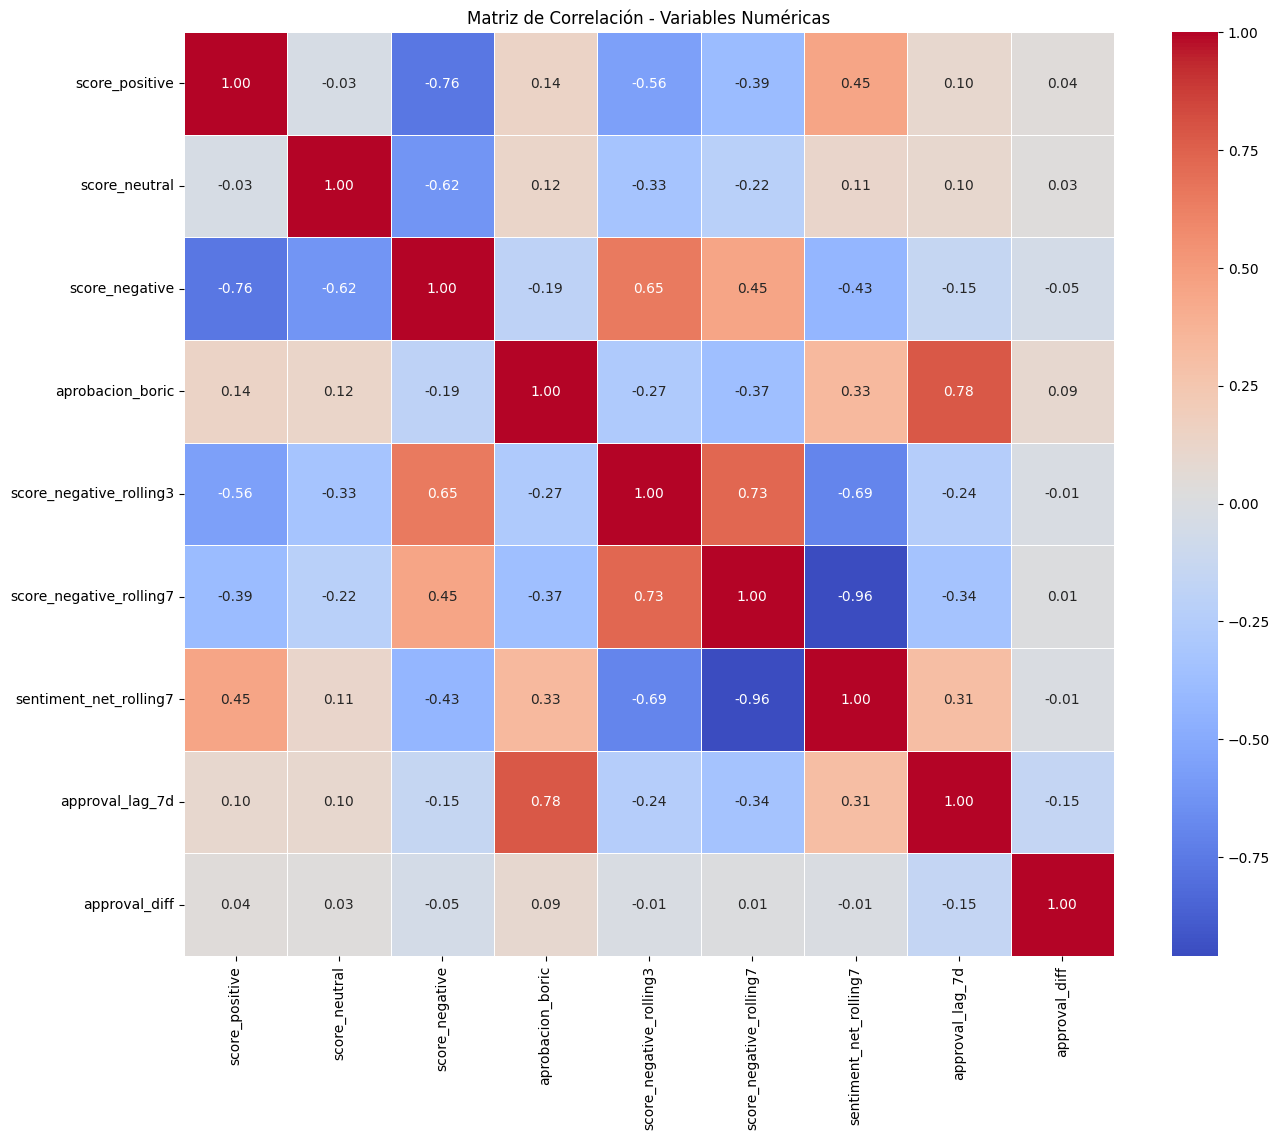

In [56]:
correlation_matrix = df_eda.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación - Variables Numéricas")
plt.show()